In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
co2 = pd.read_csv('../data/cleaned/co2_emissions_kt_by_country_clean.csv')
gdp = pd.read_csv('../data/cleaned/gdp_clean.csv')
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_1900_2012_cleaned.csv')

In [38]:
date_begin = '1900-01-01' 
date_end = '2012-01-01'
year_diff_begin = 1900
year_diff_end = 2012
year_diff_begin_str = '1900'
year_diff_end_str = '2012'

In [39]:
co2 = co2[(co2['year']>=date_begin) & (co2['year']<=date_end)]
co2.head()

,country_code,country_name,year,co2_in_kt
0,ABW,Aruba,1960-01-01,11092.675
1,ABW,Aruba,1961-01-01,11576.719
2,ABW,Aruba,1962-01-01,12713.489
3,ABW,Aruba,1963-01-01,12178.107
4,ABW,Aruba,1964-01-01,11840.743


In [40]:
# find out the top 10 countries with the highest co2 emission in the years 2000-2010
co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False
)
#co2rank.head(50)

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\3857256921.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False


In [41]:
country_top10_co2 = ['United States','China','Russian Federation','Japan','India','United Kingdom','Canada','France','Germany','Italy']

In [42]:
co2_top10 = co2[co2['country_name'].isin(country_top10_co2)]
#co2_top10

In [43]:
co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)
#co2_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\2476684700.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)


<Axes: xlabel='co2_in_kt', ylabel='country_name'>

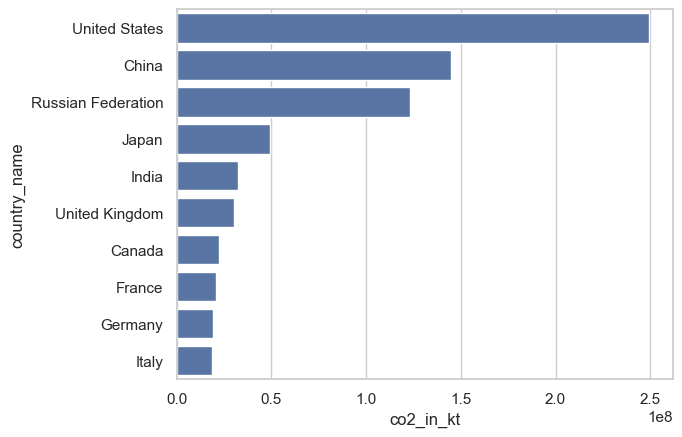

In [44]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt', order=country_top10_co2)

In [45]:
country_top10_temp = ['United States','China','Russia','Japan','India','United Kingdom','Canada','France','Germany','Italy']

In [46]:
#temp_county['country'].unique()

In [47]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
temp_county_top10.head()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
54240,98831,1900-01-01,-23.610,0.874,Canada
54241,98832,1900-02-01,-22.475,1.083,Canada
54242,98833,1900-03-01,-16.527,0.821,Canada
54243,98834,1900-04-01,-4.487,1.029,Canada
54244,98835,1900-05-01,3.231,0.865,Canada


In [48]:
temp_county_top10['country'].unique()

array(['Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan',
       'Russia', 'United Kingdom', 'United States'], dtype=object)

In [49]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [50]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\1751133901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
54240,98831,1900-01-01,-23.610,0.874,Canada,1900
54241,98832,1900-02-01,-22.475,1.083,Canada,1900
54242,98833,1900-03-01,-16.527,0.821,Canada,1900
54243,98834,1900-04-01,-4.487,1.029,Canada,1900
54244,98835,1900-05-01,3.231,0.865,Canada,1900
...,...,...,...,...,...,...
307735,557807,2012-08-01,21.422,0.251,United States,2012
307736,557808,2012-09-01,17.036,0.185,United States,2012
307737,557809,2012-10-01,9.688,0.225,United States,2012
307738,557810,2012-11-01,3.330,0.120,United States,2012


In [51]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\2060332134.py:1: FutureWarning: The provided callable <function mean at 0x0000027EDCE5AC00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1900,-5.018750
1,Canada,1901,-5.052250
2,Canada,1902,-5.170917
3,Canada,1903,-5.302583
4,Canada,1904,-5.905083
...,...,...,...
1125,United States,2008,8.951417
1126,United States,2009,9.137083
1127,United States,2010,9.505583
1128,United States,2011,9.549917


In [52]:
list_of_row_index = temp_county_top10_pivot[temp_county_top10_pivot['year'].isin([year_diff_begin,year_diff_end]) ==False].index.tolist()
temp_county_top10_pivot_dropyears = temp_county_top10_pivot.drop(list_of_row_index,axis=0)
temp_county_top10_pivot_dropyears

,country,year,average_temperature
0,Canada,1900,-5.018750
112,Canada,2012,-3.176833
113,China,1900,6.444167
225,China,2012,7.077083
226,France,1900,12.987333
338,France,2012,13.707167
339,Germany,1900,8.452083
451,Germany,2012,9.227167
452,India,1900,24.367833
564,India,2012,24.640833


In [53]:
temp_county_top10_diff = pd.pivot(temp_county_top10_pivot_dropyears, index='country', columns='year', values='average_temperature').reset_index()
temp_county_top10_diff

year,country,1900,2012
0,Canada,-5.018750,-3.176833
1,China,6.444167,7.077083
2,France,12.987333,13.707167
3,Germany,8.452083,9.227167
4,India,24.367833,24.640833
5,Italy,12.998000,14.079000
6,Japan,11.473667,12.565667
7,Russia,-5.874333,-3.901750
8,United Kingdom,8.550417,9.037417
9,United States,9.021583,10.261083


In [54]:
temp_county_top10_diff.columns = ['country',year_diff_begin_str,year_diff_end_str]
temp_county_top10_diff

,country,1900,2012
0,Canada,-5.018750,-3.176833
1,China,6.444167,7.077083
2,France,12.987333,13.707167
3,Germany,8.452083,9.227167
4,India,24.367833,24.640833
5,Italy,12.998000,14.079000
6,Japan,11.473667,12.565667
7,Russia,-5.874333,-3.901750
8,United Kingdom,8.550417,9.037417
9,United States,9.021583,10.261083


In [55]:
temp_county_top10_diff['temp_diff']=temp_county_top10_diff[year_diff_end_str]-temp_county_top10_diff[year_diff_begin_str]
temp_county_top10_diff

,country,1900,2012,temp_diff
0,Canada,-5.018750,-3.176833,1.841917
1,China,6.444167,7.077083,0.632917
2,France,12.987333,13.707167,0.719833
3,Germany,8.452083,9.227167,0.775083
4,India,24.367833,24.640833,0.273000
5,Italy,12.998000,14.079000,1.081000
6,Japan,11.473667,12.565667,1.092000
7,Russia,-5.874333,-3.901750,1.972583
8,United Kingdom,8.550417,9.037417,0.487000
9,United States,9.021583,10.261083,1.239500


In [56]:
co2_top10_pivot.rename(index={'Russian Federation':'Russia'}, inplace=True)
co2_top10_pivot

,co2_in_kt
country_name,
Canada,2.213227e+07
China,1.449643e+08
France,2.076543e+07
Germany,1.926810e+07
India,3.246730e+07
Italy,1.891904e+07
Japan,4.908074e+07
Russia,1.230439e+08
United Kingdom,3.005835e+07


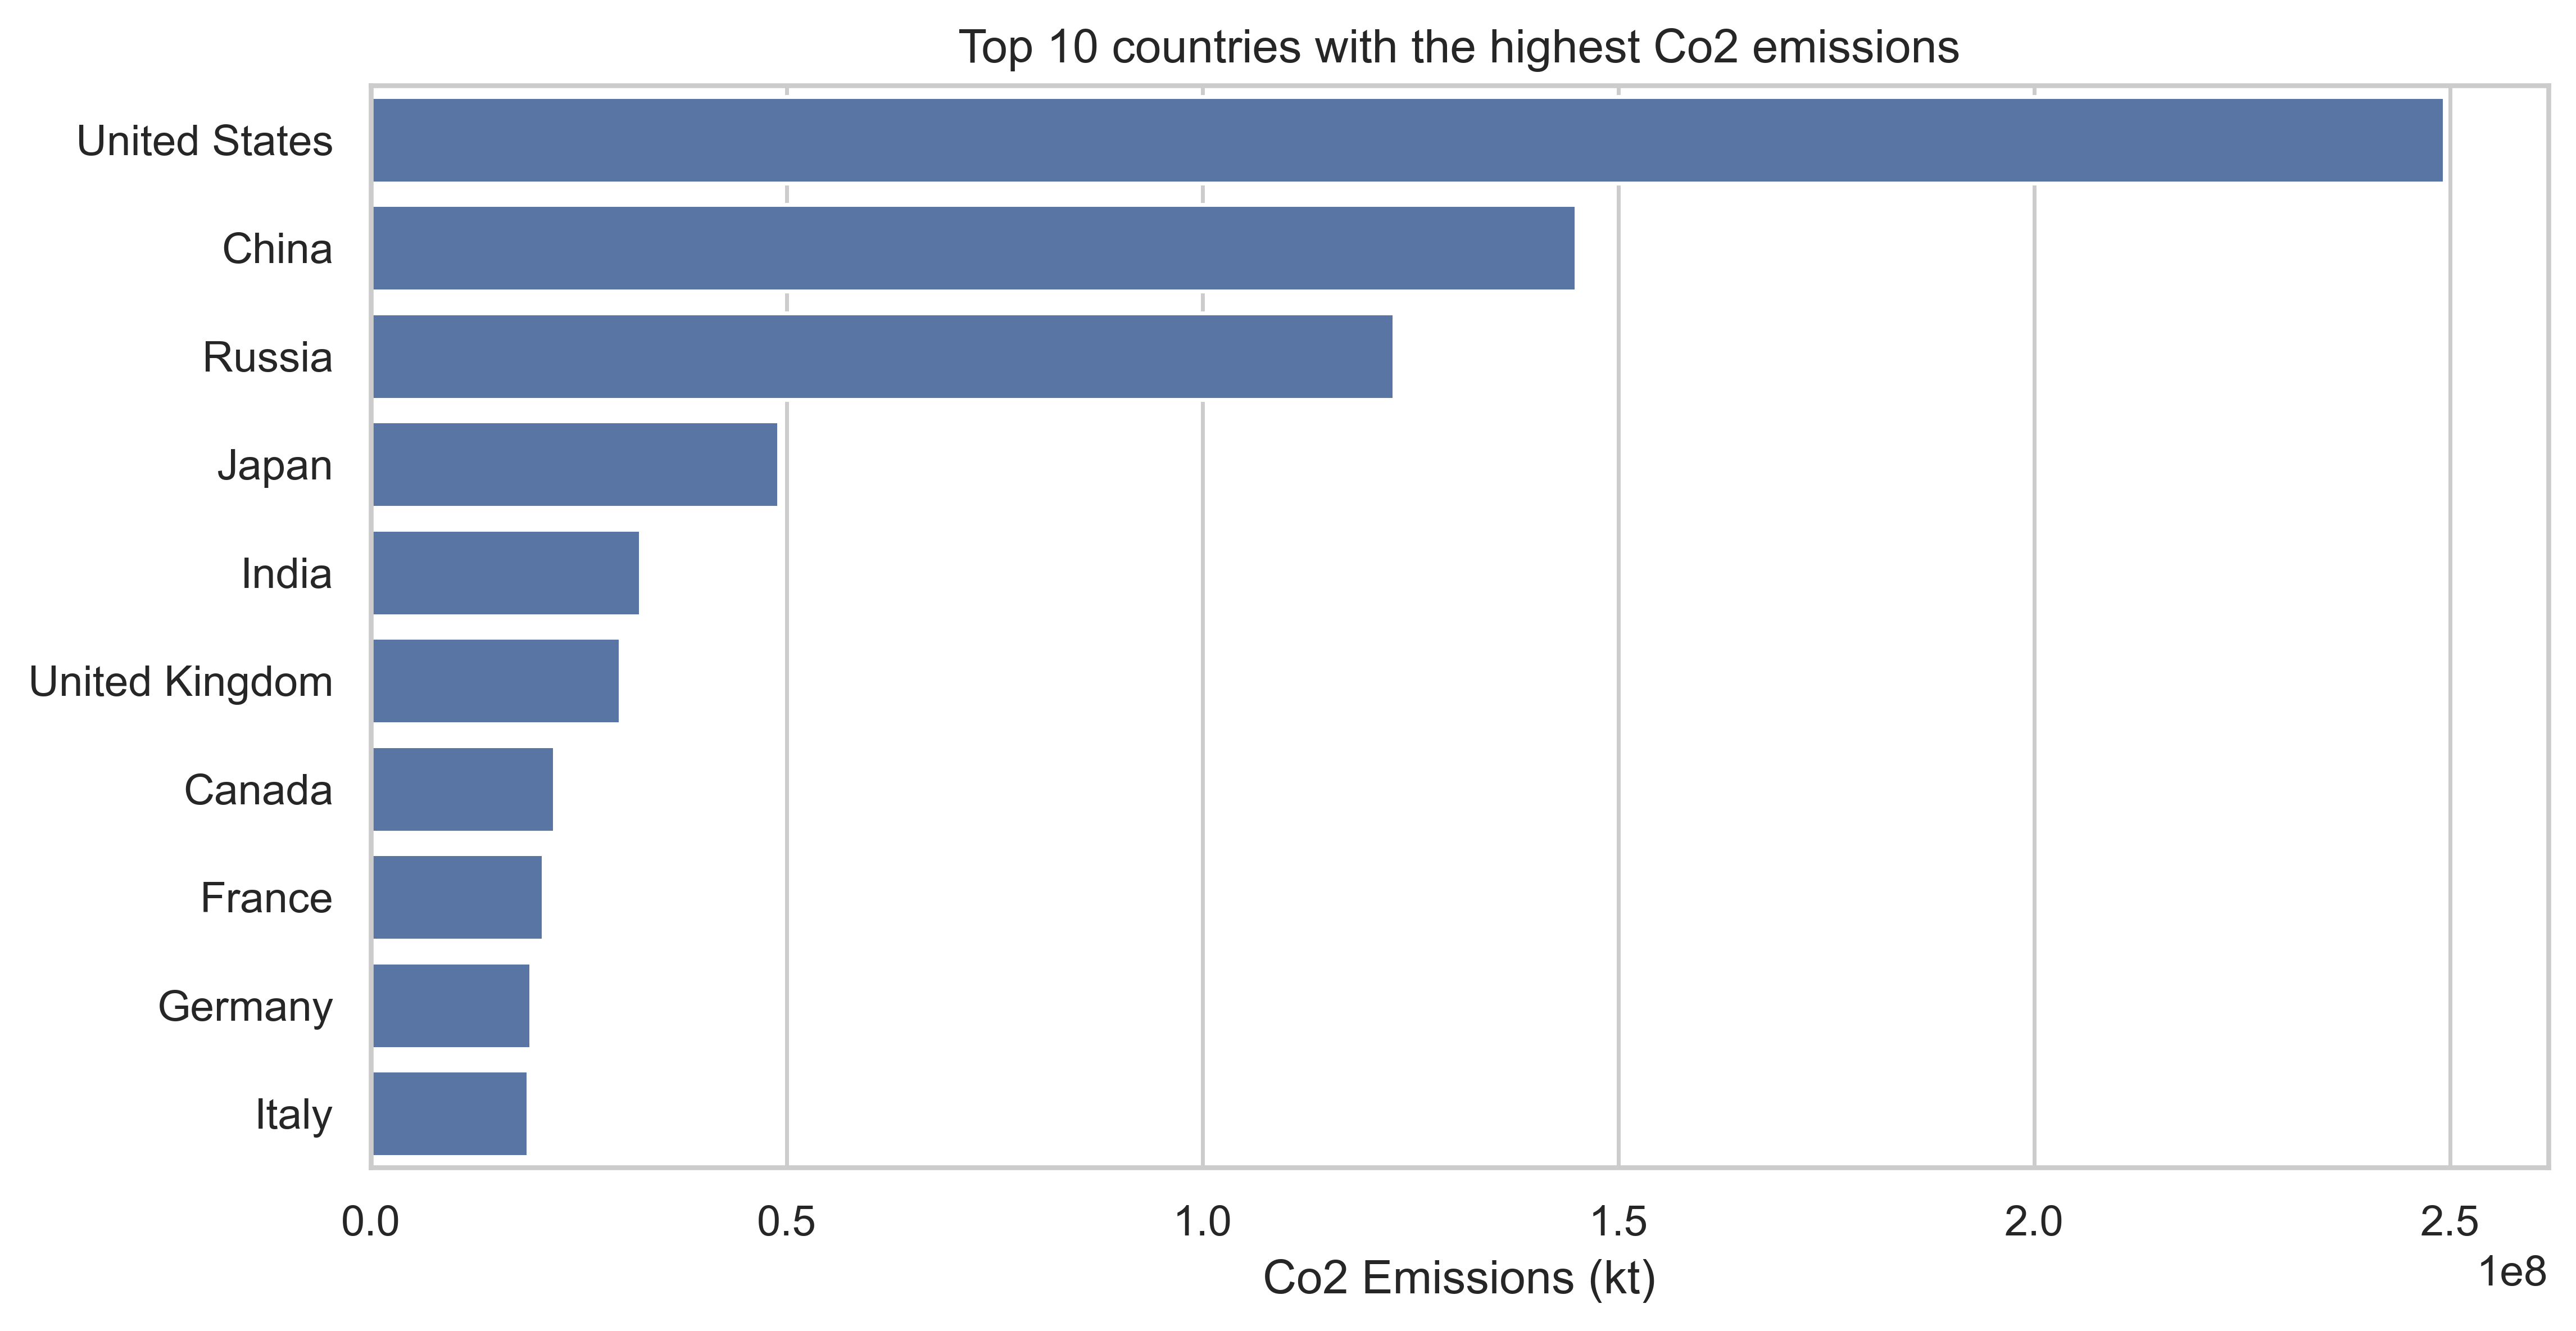

In [57]:
fig,ax = plt.subplots(figsize=(10,5), dpi=500)
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt', order=country_top10_temp)
sns.set(style="whitegrid")
ax.set_xlabel('Co2 Emissions (kt)')
ax.set_ylabel('')
ax.set_title('Top 10 countries with the highest Co2 emissions')
plt.savefig('../resources/pictures/Top 10 countries with the highest Co2 emissions.png', format='png')

In [58]:
temp_global = pd.read_csv('../data/cleaned/annual_increase_of_temp_global.csv')

In [59]:
global_increase = temp_global.mean()[1] * temp_global.count()[1]

C:\Users\schue\AppData\Local\Temp\ipykernel_42356\574085252.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_increase = temp_global.mean()[1] * temp_global.count()[1]
C:\Users\schue\AppData\Local\Temp\ipykernel_42356\574085252.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_increase = temp_global.mean()[1] * temp_global.count()[1]


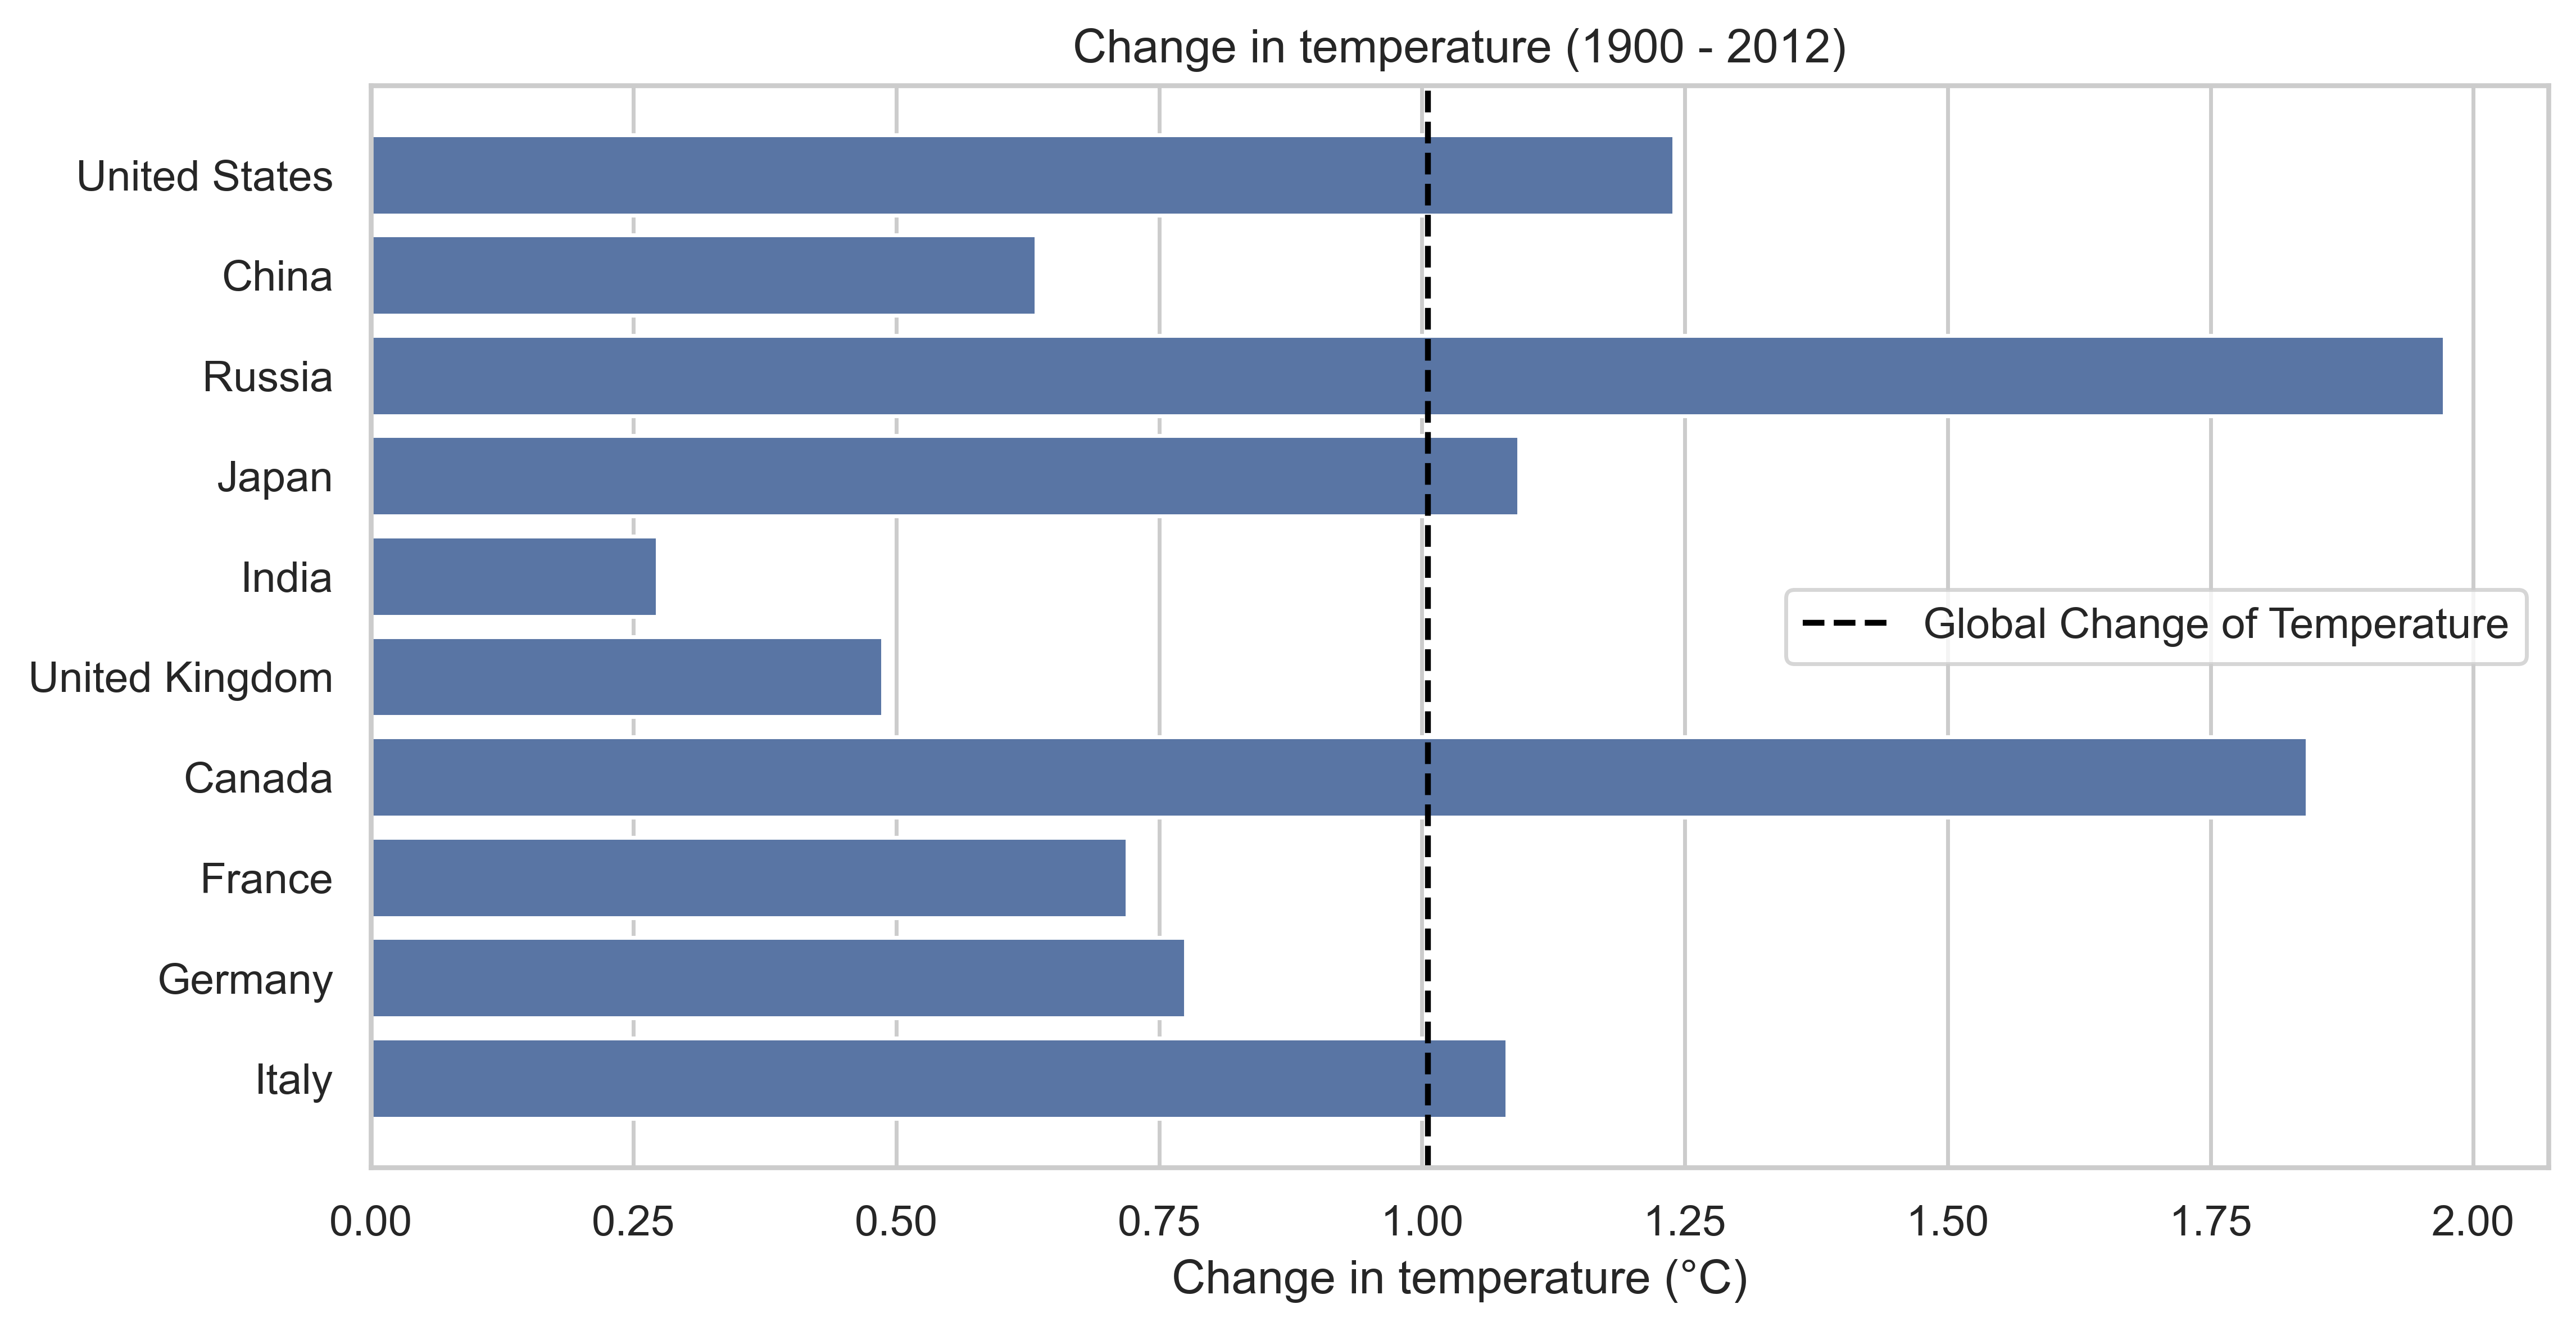

In [63]:
fig,ax = plt.subplots(figsize=(10,5), dpi=500)
sns.barplot(data=temp_county_top10_diff, y='country', x='temp_diff', order=country_top10_temp)
sns.set(style="whitegrid")
ax.set_xlabel('Change in temperature (°C)')
ax.set_ylabel('')
ax.set_title('Change in temperature (1900 - 2012)')
plt.axvline(x=global_increase, color='black', linestyle='--')
plt.plot([], [], color='black', linestyle='--', label='Global Change of Temperature')
plt.legend(loc='center right')
plt.savefig('../resources/pictures/Change in temperature 1900 - 2012.png', format='png')